In [2]:
import pandas as pd

df = pd.read_csv("../../samples/timing/timing.csv")
df

,nstep,valid,unique,valid_unique,rep,time
0,15,0.9819,0.919035,0.9024,0,34.672274
1,30,0.9892,0.951173,0.9409,0,50.378526
2,60,0.9900,0.948586,0.9391,0,86.920108
3,120,0.9902,0.945567,0.9363,0,159.935883
4,240,0.9911,0.950156,0.9417,0,316.872787
5,15,0.9830,0.923499,0.9078,1,33.676313
6,30,0.9883,0.947283,0.9362,1,50.383918
7,60,0.9909,0.950247,0.9416,1,86.936844
8,120,0.9891,0.950157,0.9398,1,171.864791
9,240,0.9892,0.947736,0.9375,1,305.899844


In [3]:
nsteps = df.groupby("nstep").max().reset_index().nstep.values
timing = df.groupby("nstep").mean().reset_index().time.values
min_valid_uniq = df.groupby("nstep").min().reset_index().valid_unique.values
max_valid_uniq = df.groupby("nstep").max().reset_index().valid_unique.values
mean_valid_uniq = df.groupby("nstep").mean().reset_index().valid_unique.values

In [4]:
timing

array([ 32.94765615,  50.37647924,  87.58293996, 162.28936453,
       310.21918888])

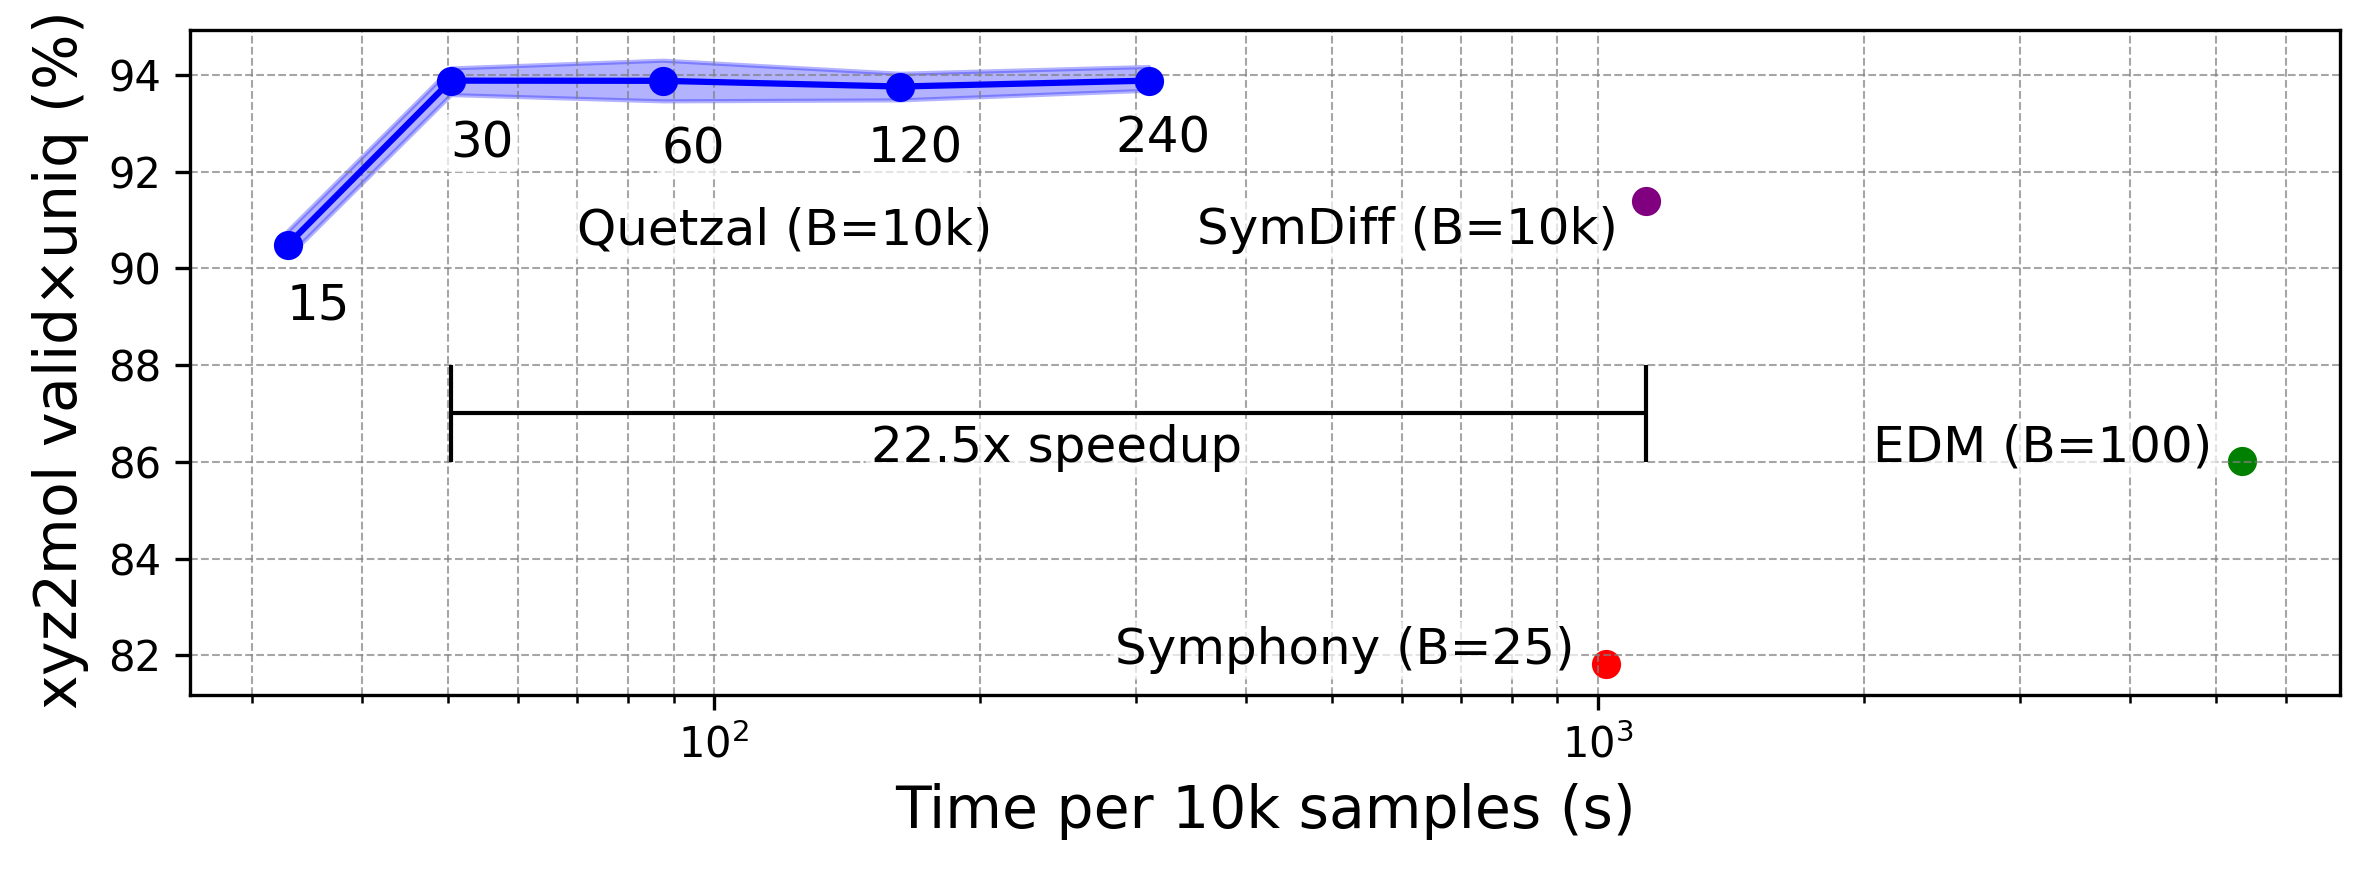

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3), dpi=300)

# Plot mean and range
plt.plot(timing, mean_valid_uniq*100, label="mean", color='blue', marker='o')
plt.fill_between(timing, min_valid_uniq*100, max_valid_uniq*100, color='blue', alpha=0.3, label='range')
plt.xlabel("Time per 10k samples (s)", fontsize=14)
plt.ylabel("xyz2mol valid$\\times$uniq (%)", fontsize=14)

# Annotate each point with nsteps
for i, txt in enumerate(nsteps):
    plt.annotate(txt, (timing[i], min_valid_uniq[i]*100), textcoords="offset points", 
                 xytext=(15, -15), ha='right', fontsize=12, 
                 bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))

# Add DAR label
plt.text(70, 0.905*100, "Quetzal (B=10k)", fontsize=12, ha='left', 
         bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))

# Plot Symphony point
x, y = 1021.55, 0.81813*100
plt.scatter(x, y, color="red")
plt.text(x-80, y, "Symphony (B=25)", fontsize=12, ha='right', 
         bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))

# Plot EDM point
x, y = 5360, 0.8601*100
plt.scatter(x, y, color="green")
plt.text(x-400, y, "EDM (B=100)", fontsize=12, ha='right', 
         bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))

# Plot SymDiff point
x, y = 1132.7621568441, 0.914*100
plt.scatter(x, y, color="purple")
plt.text(x-80, y-0.9, "SymDiff (B=10k)", fontsize=12, ha='right', 
         bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))

# add a horizontal line with small vertical lines at endpoints
left = 50.37647924
right = 1132.7621568441
ylevel = 0.87*100
plt.hlines(ylevel, left, right, color='black', linestyle='-', linewidth=1)
plt.vlines(left, ylevel-1, ylevel+1, color='black', linestyle='-', linewidth=1)
plt.vlines(right, ylevel-1, ylevel+1, color='black', linestyle='-', linewidth=1)
# say this requires a 1132.7621568441 / 50.37647924 = 22.5x speedup
plt.text(left+100, ylevel-1, "22.5x speedup", fontsize=12, ha='left', 
         bbox=dict(boxstyle="round,pad=0.1", edgecolor='none', facecolor='white', alpha=0.7))


# Log-scale x-axis and add gridlines
plt.xscale("log")
plt.grid(True, which="both", linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.tight_layout()
plt.savefig("valid_unique_timing.png", dpi=300)

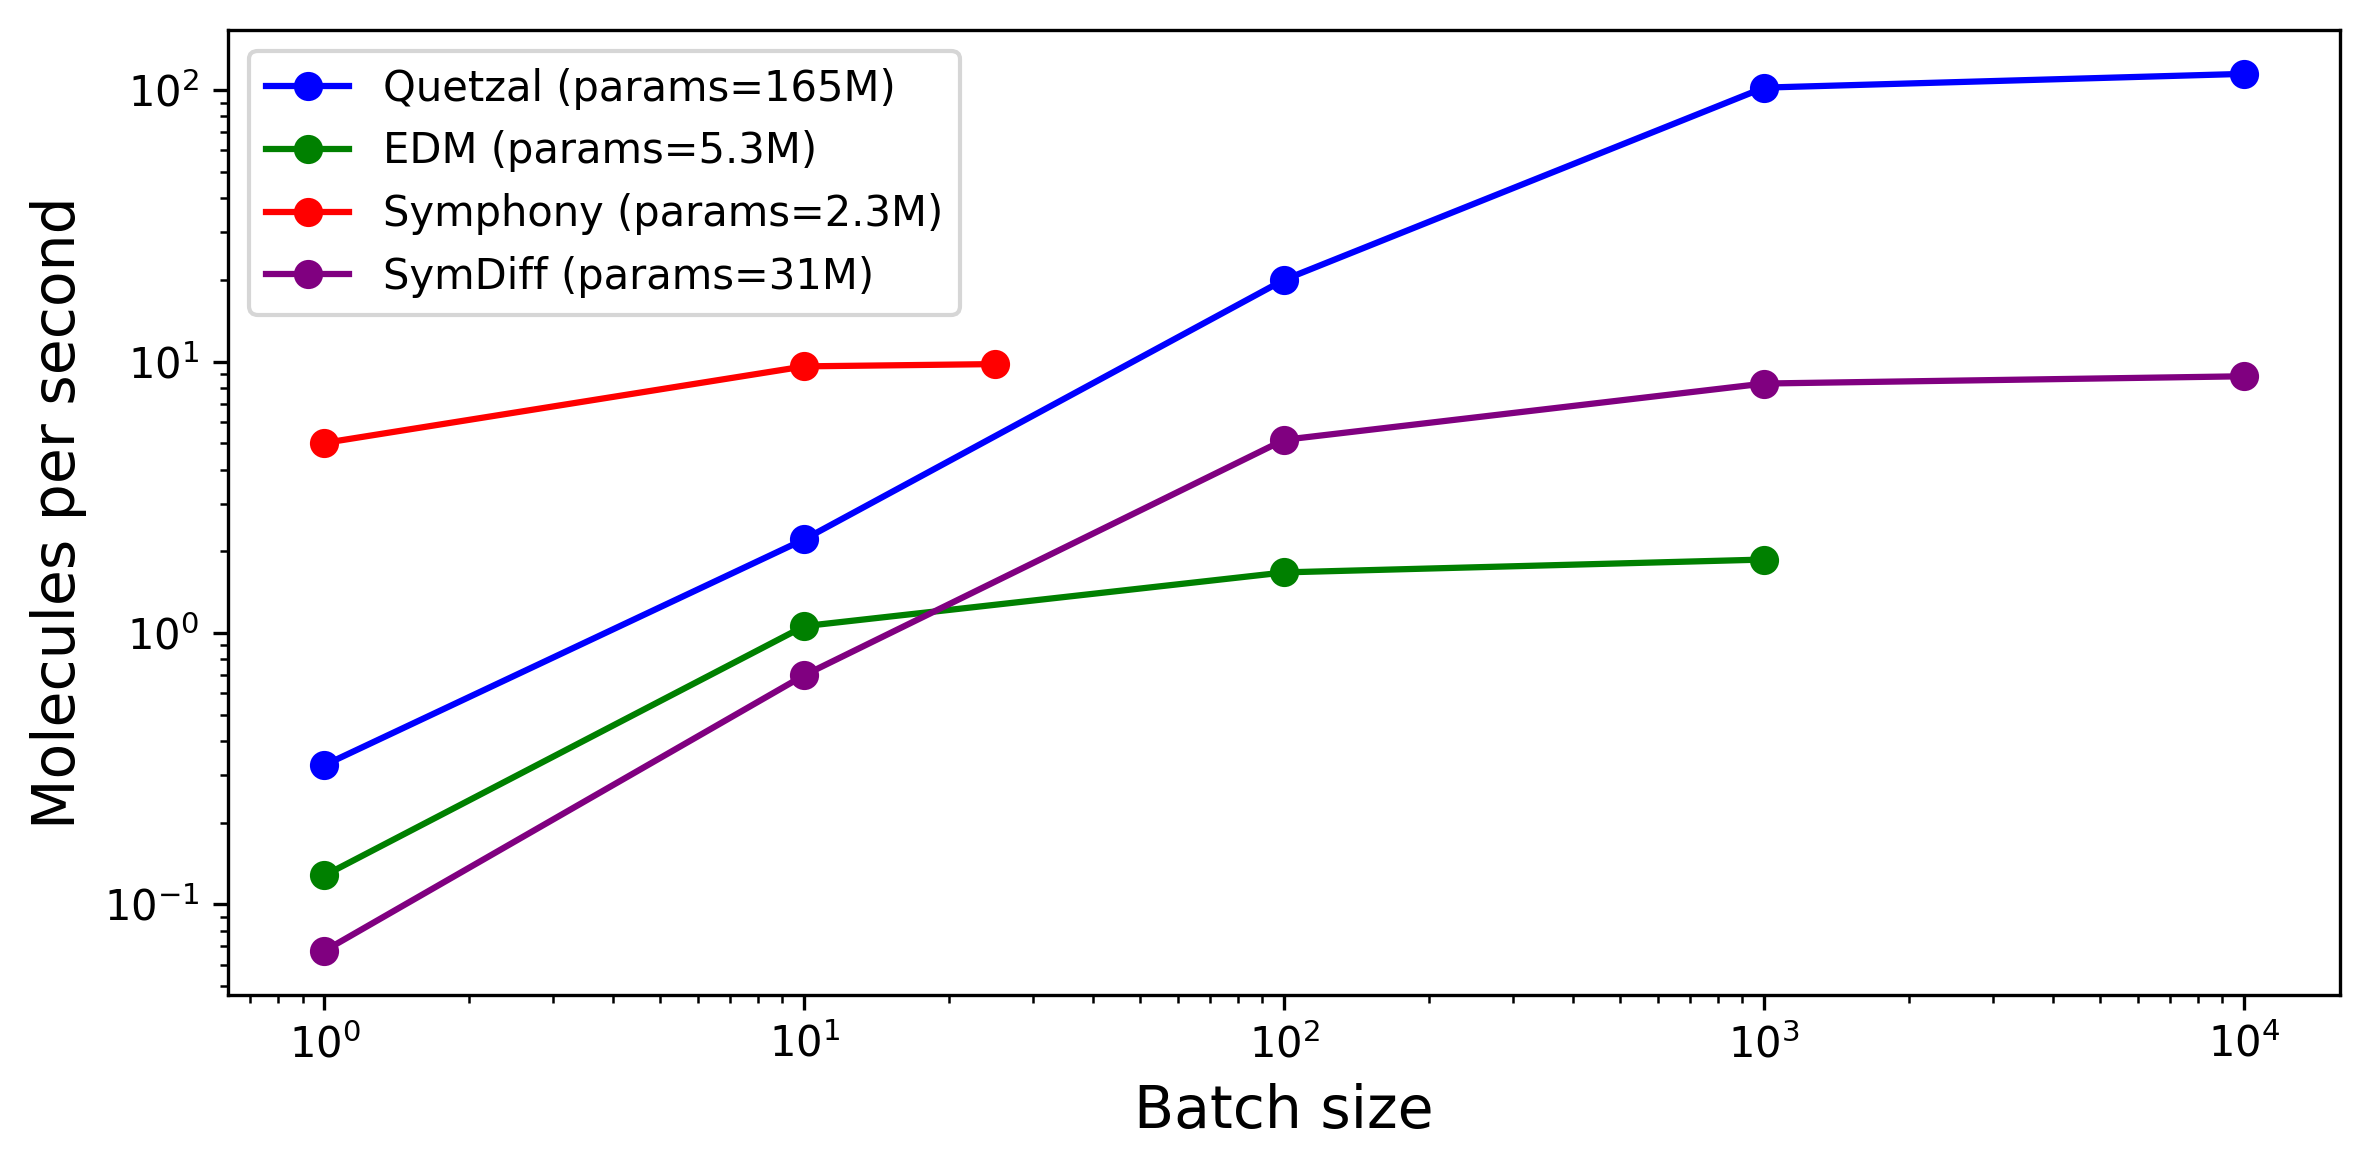

In [6]:
# plot valid_unique as a function of timing
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4), dpi=300)

plt.ylabel("Molecules per second", fontsize=14)
plt.xlabel("Batch size", fontsize=14)

bszs = [1, 10, 100, 1000, 10000]
times = [306.6561360359192 / 100, 13.55 / 30, 14.987 / 300, 29.36879324913025 / 3000, 87.1 / 10000]
inv = [1/t for t in times]

plt.plot(bszs, inv, color='blue', marker='o', label="Quetzal (params=165M)")

edm_bszs = [1, 10, 100, 1000]
edm_times = [(8.438861846923828 + 7.516941070556641 +7.507749319076538)/3 , (9.431982040405273 / 10 + 9.431982040405273 / 10)/2, 59.8 / 100, 536.21 / 1000 ]
edm_inv = [1/t for t in edm_times]
plt.plot(edm_bszs, edm_inv, color='green', marker='o', label="EDM (params=5.3M)")

sy_bszs = [1, 10, 25]
sy_times = [199.39238810539246/1000, 104.15020418167114/ 1000, 1021.55/10000]
sy_inv = [1/t for t in sy_times]
plt.plot(sy_bszs, sy_inv, color='red', marker='o', label="Symphony (params=2.3M)")

symdiff_bszs = [1, 10, 100, 1000, 10000]
symdiff_times = [(14.594736814498901+14.436200141906738+15.425683736801147)/3, 14.30077862739563/10, 19.41806983947754/100, 120.4822793006897/1000, (1135.5243136882782 + (18*60+50)) / 2 /10000]
symdiff_inv = [1/t for t in symdiff_times]
plt.plot(symdiff_bszs, symdiff_inv, color='purple', marker='o', label="SymDiff (params=31M)")

plt.legend()

plt.xscale("log")
plt.yscale("log")

plt.tight_layout()
plt.savefig("molecules_per_second.png", dpi=300)

In [ ]:
import sys
sys.path.append("../..")
from chem import Molecule
import tqdm

samples_dir = "../../samples/gen/symdiff"
Ms = []
for i in tqdm.trange(10000):
    path = f"{samples_dir}/molecule_{str(i).zfill(3)}.txt"
    M = Molecule.from_xyz(path)
    Ms.append(M)

In [ ]:
from metrics import compute_valid_unique
from edm_metrics import edm_metrics
import os
import json

samples = Ms
dataset = "qm9"

valid, unique, invalid_idxs = compute_valid_unique(samples, return_invalid=True)
print(f"Validity: {valid:.3f}")
print(f"Uniqueness: {unique:.3f}")
print(f"Validity * Uniqueness: {valid * unique:.3f}")

invalid_path = os.path.join(samples_dir, "invalid_idxs.json")
with open(invalid_path, "w") as f:
    json.dump(invalid_idxs, f, indent=4)

atom_stability, mol_stability, edm_validity, edm_valid_uniq, edm_invalid_idxs = edm_metrics(samples, dataset)

print(f"Atom stability: {atom_stability:.3f}")
print(f"Mol stability: {mol_stability:.3f}")
print(f"EDM validity: {edm_validity:.3f}")
print(f"EDM validity * uniqueness: {edm_valid_uniq:.3f}")

edm_invalid_path = os.path.join(samples_dir, "edm_invalid_idxs.json")
with open(edm_invalid_path, "w") as f:
    json.dump(edm_invalid_idxs, f, indent=4)

sample_metrics = {
    "validity": valid,
    "uniqueness": unique,
    "valid_uniq": valid * unique,
    "atom_stability": atom_stability,
    "mol_stability": mol_stability,
    "edm_validity": edm_validity,
    "edm_valid_uniq": edm_valid_uniq
}

metrics_path = os.path.join(samples_dir, "metrics.json")
with open(metrics_path, "w") as f:
    json.dump(sample_metrics, f, indent=4)

Validity: 0.928
Uniqueness: 0.985
Validity * Uniqueness: 0.914
Atom stability: 0.988
Mol stability: 0.876
EDM validity: 0.957
EDM validity * uniqueness: 0.938
